# TP 3: Hasting-Metropolis (and Gibbs) samplers


## Imports



In [9]:
import numpy as np 
import pylab as plt
import scipy as sp

from scipy import stats, optimize, interpolate

# Exercise 1: Hasting-Metropolis within Gibbs – Stochastic Approximation EM

## 1.A – A population model for longitudinal data

### Question 1

**`Write the complete log-likelihood of the previous model log q(y, z, θ) and show that the proposed model belongs to the curved exponential family.`**


<font color='burgandy'>To start we define the entirety of the model:


<center><font color='burgandy'>$y_{i,j} =d_i(t_i,j)+ε_{i,j}$ with $d_i(t):=d(α_i(t−t_0 −τ_i)+t_0)$ 

<center><font color='burgandy'>$α_i = exp(ξ_i)$ where $ξ_i ∼ N(0,σ_ξ)$


<center>$τ_i ∼N(0,σ_τ^2)$</font>

<center>where $ε_{i,j}∼ N(0,σ )$  ;
$d(t) := p_0 + v_0(t − t_0)$  ; 
$t_0 ∼N(\bar{t_0},σ_t^2 ) $  ; 
$v_0 ∼N(\bar{v_0},σ_v^2)$ and $p_0$ fixed </font></center>










<font color='burgandy'>Let's consider: The parameters of the model are $θ = (\bar{t_0},\bar{v_0},σ_ξ,σ_τ,σ)$. For all $i ∈  1,N , z_i = (α_i,τ_i)$ are random variables called random effects and $z_{pop} = ( t_0 , v_0 )$ are called fixed effects. The fixed effects are used to model the group progression whereas random effects model individual progressions.
Likewise, we define $θ_i = (σ_ξ,σ_τ,σ)$ and $θ_{pop} = (t_0,v_0)$.</font>



**`Answer`**




*WE START BY COMPUTING THE LOG LIKELIHOOD OF THE MODEL:*

We have $q(y,z,θ)=q(y \lvert z,θ) q(z\lvert θ) q(θ)$

with $z=(z_i, z_{pop})$ and  $θ = (\bar{t_0},\bar{v_0},σ_ξ,σ_τ,σ)$

We compute the log for each element of the product: 

1. **For $\log q(θ)$:**
\begin{align}
⇒ \log q(θ)&= -\frac{1}{2} [(\frac{\bar{v_0} -\bar{\bar{v_0}}}{s_{v_0}})^2 + (\frac{\bar{t_0} -\bar{\bar{t_0}}}{s_{t_0}})^2] \\
&+ m \log(\frac{v}{σ}) -2log(σ)-\frac{1}{2 σ^2} v^2\\
 &+ m_{𝛏} \log(\frac{v_{𝛏}}{σ_{𝛏}}) -2log(σ_𝛏)-\frac{1}{2 σ_𝛏^2} v_𝛏^2\\
 &+ m_τ \log(\frac{v_τ}{σ_τ}) -2log(σ_τ)-\frac{1}{2 σ_τ^2} v_τ^2 +c_1
\end{align}
2. **For $\log q(z\lvert θ)$:**
\begin{align}
⇒ \log q(z\lvert θ) &= \log q(z_{pop}\lvert θ_{pop}) +\log q(z_i\lvert θ_i) \\
&=-\frac{1}{2} [(\frac{v_0 -\bar{v_0}}{s_{v_0})}^2 + (\frac{t_0 -\bar{t_0}}{\sigma_{t_0}})^2]\\
& -𝚺_i [\frac{1}{2}(\frac{𝛏_i}{σ_𝛏})^2 +\frac{1}{2}(\frac{\tau_i}{σ_τ})^2+ log(σ_τ σ_𝛏)] +c_2
\end{align}
3. **For $\log q(y \lvert z,θ)$:**
\begin{align}
⇒ \log q(y \lvert z,θ)&= 𝚺_i 𝚺_j \log q(y_{i,j} \lvert z,θ) \\
&=𝚺_i 𝚺_j [-\frac{1}{2} (\frac{y_{i,j}-d_i(t_{i,j})}{2})^2 -log(σ)]+c_3
\end{align}

**Finally:**
\begin{align}
\log q(y,z,θ)&= \log q(y \lvert z,θ) + \log q(z\lvert θ)+\log q(θ) \\
&=𝚺_i 𝚺_j [-\frac{1}{2} (\frac{y_{i,j}-d_i(t_{i,j})}{2})^2 -\log(σ)]\\
&-𝚺_i [\frac{1}{2}(\frac{𝛏_i}{σ_𝛏})^2 +\frac{1}{2}(\frac{\tau_i}{σ_τ})^2+ \log(σ_τ σ_𝛏)] -\frac{1}{2} [(\frac{v_0 -\bar{v_0}}{s_{v_0})}^2 + (\frac{t_0 -\bar{t_0}}{\sigma_{t_0}})^2] \\
 &-\frac{1}{2} [(\frac{\bar{v_0} -\bar{\bar{v_0}}}{s_{v_0}})^2 + (\frac{\bar{t_0} -\bar{\bar{t_0}}}{s_{t_0}})^2] + m \log(\frac{v}{σ}) -2log(σ)-\frac{1}{2 σ^2} v^2+ m_{𝛏} \log(\frac{v_{𝛏}}{σ_{𝛏}}) -2log(σ_𝛏)-\frac{1}{2 σ_𝛏^2} v_𝛏^2+ m_τ \log(\frac{v_τ}{σ_τ}) -2log(σ_τ)-\frac{1}{2 σ_τ^2} v_τ^2+C
\end{align}
 


*WE PROVE THAT THE MODEL BELONGS TO THE CURVED EXPONENTIAL FAMILY:*

**Definition (Exponential Family). A class of probability measures $P =
{ P_θ : θ ∈ Θ }$ is called an exponential family if there exist a number $k ∈
ℕ$, real-valued functions $η_1$, ..., $η_k$ on Θ, real-valued statistics $T_1$, ..., $T_k$ and a function h on X such that the probability function has the form $p(x; θ) = A(θ) \exp( 𝚺_i (T_i(x)η_i(θ))h(x)$**

Hence we try to express $q(y,z,θ)$ as:
\begin{align}
q(y,z,θ)=\exp[-𝜙(θ) +<T(y,z), η(θ)>] \\
\log q(y,z,θ)=-𝜙(θ) +<T(y,z), η(θ)>
\end{align}

We define:
\begin{align}
&T(y,z)=[𝚺_i 𝚺_j [ (y_{i,j}-d_i(t_{i,j}))^2, 𝚺_i 𝛏_i^2,𝚺_i \tau_i^2, v_0, t_0] \\
&η(θ)^T= [-\frac{1}{2σ^2},-\frac{1}{2σ_𝛏^2},-\frac{1}{2σ_τ^2},-\frac{\bar{v_0}}{2σ_{v_0}^2},-\frac{\bar{t_0}}{2σ_{t_0}^2}] \\
&𝜙(θ)=(NK + m + 2) \log σ + N + m_ξ + 2)\log σ_ξ + (N + m_τ + 2) \log σ_τ + \bar{v_0}^2 (\frac{1}{2σ_{v_o}^2}+\frac{1}{2s_{v_o}^2}) -\frac{\bar{v_0}.\bar{\bar{v_0}}}{s_{v_o}^2} + \bar{t_0}^2 (\frac{1}{2σ_{t_o}^2}+\frac{1}{2s_{t_o}^2}) -\frac{\bar{t_0}.\bar{\bar{t_0}}}{s_{t_o}^2} 
\end{align}


### Question 2



```
# Generate synthetic data from the model by taking some reasonable values for the parameters.
```



In [2]:
# Trajectory
def d(t, p0, v0, t0):
  '''
  Computes the trajectory 
  '''
  return p0 + v0 * (t - t0)

#data generation 
def generate_data(N,K,FIXED_PARAMS,TARGET_PARAMS, return_plot=True,number_plots=6):
  '''
  Generates data following the populational model and a plot if needed 
  '''
  #measurements
  y = np.zeros((N,K))
  #variables
  t0 = np.random.normal(loc=TARGET_PARAMS["mean_t0"], scale=FIXED_PARAMS["sigma_t0"], size=1)
  v0 = np.random.normal(loc=TARGET_PARAMS["mean_v0"], scale=FIXED_PARAMS["sigma_v0"], size=1)
  p0 = FIXED_PARAMS["p0"]
  ksi = np.random.normal(scale=TARGET_PARAMS["sigma_xi"], size=N)
  alpha = np.exp(ksi)
  tau = np.random.normal(scale=TARGET_PARAMS["sigma_tau"], size=N)

  #estimation
  for i in range(K):
    t = alpha * (i - t0 - tau)
    eps = np.random.normal(scale=TARGET_PARAMS["sigma"], size = N)
    y[:,i] = d(t + t0, p0, v0, t0) + eps
  
  #plot
  if return_plot:
    plt.figure(figsize=(15,7))
    for i in range(number_plots):
      plt.plot(np.arange(K), y[i,:] , label = '$y$'+str(i))
    plt.title('Generated Data')
    plt.legend()
    plt.show()
  
  return y


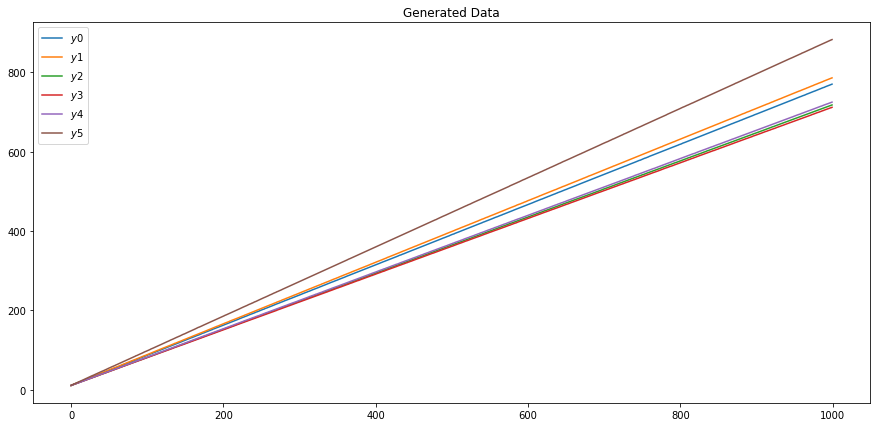

In [3]:
#Parameters 

# Fixed parameters
FIXED_PARAMS = {
 "sigma_p0": 2,
 "sigma_t0": 1,
 "sigma_v0": 1,
 "p0": 10,
}
# To estimate
TARGET_PARAMS = {
 "mean_t0": 0,
 "mean_v0": 1,
 "sigma_xi": 0.1,
 "sigma_tau": 0.1,
 "sigma": 0.1 ,
}

N = 10 # number of individuals
K = 1000 # number of measurements

# Generate synthetic data
y=generate_data(N,K,FIXED_PARAMS,TARGET_PARAMS)

## 1.B – HM-SAEM – Hasting-Metropolis sampler

### Question 3




```
 Propose a Metropolis-Hastings sampler to sample from the a posteriori distribution $(z | y, θ)$ of the latent variable $z = (z_{pop}, z_i)_i= (t0, v0, ξ_i, τ_i)_i$
```



For this section we're going to implement the Symmetric Random Walk Hasting-Metropolis algorithm with some modifications in order to simplify the calculation process by using the previously calculated log posteriority 

In [4]:
def log_posterior(y, z, p0, t, 
                  mean_t0, mean_v0, sigma_t0, sigma_v0, 
                  sigma_ksi_proposal, sigma_tau_proposal):
    
    t0, v0 = z[0:2]
    ksi = z[2:N+2].reshape(-1, 1)  # (N, 1)
    tau = z[N+2:].reshape(-1, 1)  # (N, 1)
    
    ti = np.exp(ksi) * (t - t0 - tau)  # (N, K)
    log_posterior = np.sum((y - d(ti + t0, p0, v0, t0)) **2) 
    +(np.sum(ksi ** 2) / (2 * sigma_ksi_proposal **  2) + np.sum(tau ** 2) / (2 * sigma_tau_proposal ** 2)
    + (t0 - mean_t0) ** 2 / (2 * sigma_t0 ** 2)+ (v0 - mean_v0) ** 2 / (2 * sigma_v0 ** 2))
    
    return log_posterior

In [5]:
def SRWHM(y, z,p0,
          mean_t0,mean_v0,sigma_t0,sigma_v0, 
          sigma_ksii,sigma_tau,sigma_ksi_proposal,
          sigma_tau_proposal,N,maxiter=10000):

    # proposal distribution : a multivariate gaussian
    mean_prop = [mean_t0, mean_v0] + (2 * N) * [0]
    cov_prop = [sigma_t0, sigma_v0] + [sigma_ksi_proposal] * N +  [sigma_tau_proposal] * N
    cov_prop = cov_prop = 0.005 * np.eye(2 * N + 2) * cov_prop
    
    # sample an initial state z0
    z_list = [z]
    t = np.arange(K).reshape(1, -1) 
    
    for _ in range(maxiter):
        zk = np.random.multivariate_normal(mean=z, cov=cov_prop)
        
        # log proba
        LP_k = log_posterior(y, zk, p0, t, mean_t0, mean_v0, sigma_t0, sigma_v0, sigma_ksi_proposal, sigma_tau_proposal)
        LP_cur = log_posterior(y, z, p0, t, mean_t0, mean_v0, sigma_t0, sigma_v0, sigma_ksi_proposal, sigma_tau_proposal)
        # acceptance-rejection
        log_alpha = min(0, LP_k - LP_cur)
        log_uk = np.log(np.random.rand())
        if log_uk - log_alpha < 0:
            z = zk.copy()
        z_list.append(z)

    return z_list

## 1.C – HMwG-SAEM – Hasting-Metropolis within Gibbs sampler

### Question 5



```
Propose a Metropolis-Hastings within Gibbs sampler to sample from the a posteriori distribution
(zi | zpop, y, θ) of the variable zi = (ξi, τi).
```
In fact: 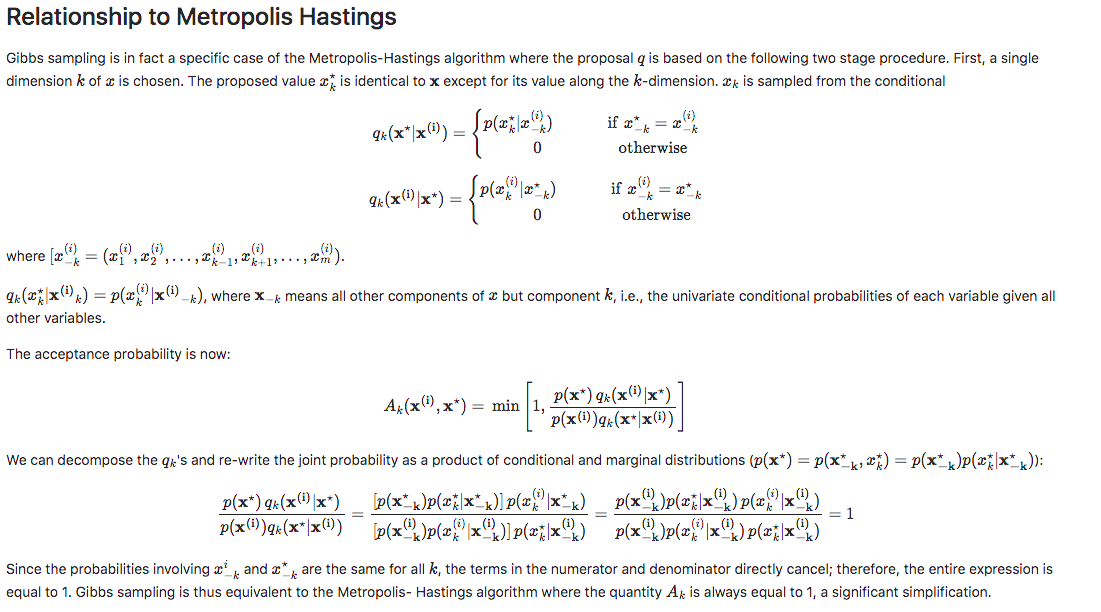


We try to implement this idea

In [10]:
#intermidiate function
def generation_step(K,yi,t0,v0,p0,ksi_i,tau_i,theta):
  # Parameters    
  sigma_tau,sigma_ksi = theta
  tk = np.arange(K)

  ti = np.exp(ksi_i) * (tk - t0 - tau_i)
  di = np.sum((yi - d(ti + t0, p0, v0, t0)) ** 2)
  pi_tau = -(tau_i / sigma_tau) ** 2 / 2
  pi_ksi = - (ksi_i/ sigma_ksi) ** 2 / 2

  return di, pi_tau,pi_ksi

In [11]:
def HM_Gibbs(N,K,y, t0, v0, tau , ksi, p0, theta, theta_MH):
    #output for zi = (ξi, τi).
    ksi_out=np.zeros(N)
    tau_out = np.zeros(N)

    for i in range(N):
        yi = y[i, :]
        
        # current state
        di,pi_tau,_=generation_step(K,y[i, :],t0,v0,p0,ksi[i],tau[i],theta)
        # proposal
        tau_proposed = np.random.normal(tau[i], theta_MH[0])
        di_proposed,pi_tau_proposed,_=generation_step(K,y[i, :],t0,v0,p0,ksi[i],tau_proposed,theta)
        # acceptance-rejection
        tau_out[i] = tau[i]
        log_alpha_tau,u = min( 0 , di_proposed +pi_tau_proposed- pi_tau - di) , np.log(np.random.uniform())
        if u - log_alpha_tau < 0 : tau_out[i] = tau_proposed

        # current state
        di,_,pi_ksi=generation_step(K,y[i, :],t0,v0,p0,ksi[i],tau_out[i],theta)
        # proposal
        ksi_proposed = np.random.normal(ksi[i], theta_MH[1] )
        di_proposed,_,pi_ksi_proposed=generation_step(K,y[i, :],t0,v0,p0,ksi_proposed,tau_out[i],theta)
        # acceptance-rejection
        ksi_out[i]=ksi[i]
        log_alpha_ksi,u = min (0, di_proposed - pi_ksi - di + pi_ksi_proposed),np.log(np.random.uniform())
        if u - log_alpha_tau < 0 : ksi_out[i] = ksi_proposed
    return tau_out, ksi_out


#Exercise 2: Multiplicative Hasting-Metropolis

## Question 1



```
Determine the density of the jumping distribution Y ∼ q(X, Y ).
```
Let f be a density function on ]−1, 1[. We consider the multiplicative Hasting-Metropolis algorithm
defined as follows.
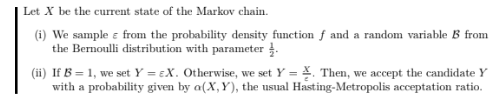

```
Answer
```




Let $h$ be a a measurable and bounded function.

We have 
\begin{align}
⇒ E[h(Y)]&= E[h(Y)⃒  \lvert B=1 ]P(B=1) +E[h(Y)⃒  \lvert B=0 ]P(B=0) \\
&= E[h(ϵX)|B = 1]P(B = 1) + E[h(\frac{X}{ϵ})|B = 0]P(B = 0)\\
 &= \underbrace{\frac{1}{2}∫_{-1}^1 h(ϵX)f(ϵ)dϵ}_\text{(1)} +\underbrace{\frac{1}{2}∫_{-1}^1 h(\frac{X}{ϵ})f(ϵ)dϵ}_\text{(2)}
\end{align}

We aim to remove $ϵ$ from the equation hence for each side of the equation we change the variable: 



*   For part 1 we assume that $X ≠ 0 $: 
$ϵ=\frac{Y}{X}$ also taking into account the sign of $X$ we get: 
\begin{align}
⇒ \frac{1}{2}∫_{-1}^1 h(ϵX)f(ϵ)dϵ &= \frac{1}{2}∫_{-\lvert X \lvert}^{\lvert X \lvert} h(Y)\frac{f(\frac{Y}{X})}{{\lvert X \lvert}}dY 
\end{align}

if $X=0$ we get $ h(0)$
*   For part 2 we assume again that $X ≠ 0 $: 
$ϵ=\frac{X}{Y}$ also taking into account the sign of $X$ we get: 
\begin{align}
⇒ \frac{1}{2}∫_{-1}^1 h(\frac{X}{ϵ})f(ϵ)dϵ &= \frac{1}{2}∫_{-1}^0 h(\frac{X}{ϵ})f(ϵ)dϵ+\frac{1}{2}∫_{0}^1 h(\frac{X}{ϵ})f(ϵ)dϵ\\
&= \frac{1}{2}∫_{-∞}^{-\lvert X \lvert} h(Y)f(\frac{X}{Y})\frac{\lvert X \lvert}{Y^2}dY+\frac{1}{2}∫_{\lvert X \lvert}^{+∞} h(Y)f(\frac{X}{Y})\frac{\lvert X \lvert}{Y^2}dY
\end{align}
if $X=0$ we get $ h(0)$

Finally: 
$E[h(Y)]= \frac{1}{2}∫_{-\lvert X \lvert}^{\lvert X \lvert} h(Y)\frac{f(\frac{Y}{X})}{{\lvert X \lvert}}dY + \frac{1}{2}∫_{-∞}^{-\lvert X \lvert} h(Y)f(\frac{X}{Y})\frac{\lvert X \lvert}{Y^2}dY+\frac{1}{2}∫_{\lvert X \lvert}^{+∞} h(Y)f(\frac{X}{Y})\frac{\lvert X \lvert}{Y^2}dY$

Hence the density $q(X,Y)$ is: 

$q(X,Y)= \frac{1}{2} 1_{[-\lvert X \lvert,\lvert X \lvert]} \frac{f(\frac{Y}{X})}{{\lvert X \lvert}} + \frac{1}{2}1_{[-∞,-\lvert X \lvert]} f(\frac{X}{Y})\frac{\lvert X \lvert}{Y^2}+\frac{1}{2}1_{[\lvert X \lvert,+∞]}f(\frac{X}{Y})\frac{\lvert X \lvert}{Y^2}$

## Question 2 



```
Compute the acceptation ratio α so that the chain has a given distribution π as invariant distri-
bution.
```


```
Answer
```




\begin{align}
α(X,Y) &= 1 ʌ \frac{q(Y , X)π(Y)}{q(X, Y )π(X)}\\
&=1ʌ\frac{\frac{1}{2} 1_{[-\lvert X \lvert,\lvert X \lvert]} \frac{f(\frac{Y}{X})}{{\lvert X \lvert}} + \frac{1}{2}1_{[-∞,-\lvert X \lvert]} f(\frac{X}{Y})\frac{\lvert X \lvert}{Y^2}+\frac{1}{2}1_{[\lvert X \lvert,+∞]}f(\frac{X}{Y})\frac{\lvert X \lvert}{Y^2} π(Y)}{\frac{1}{2} 1_{[-\lvert Y \lvert,\lvert Y \lvert]} \frac{f(\frac{X}{Y})}{{\lvert Y \lvert}} + \frac{1}{2}1_{[-∞,-\lvert Y \lvert]} f(\frac{Y}{X})\frac{\lvert Y \lvert}{X^2}+\frac{1}{2}1_{[\lvert Y \lvert,+∞]}f(\frac{Y}{X})\frac{\lvert Y \lvert}{X^2} π(X)}\\
&=1ʌ\frac{\frac{{\lvert Y \lvert}}{{\lvert X \lvert}}[\frac{1}{2}1_{[-∞,-\lvert Y \lvert]} f(\frac{Y}{X})\frac{\lvert Y \lvert}{X^2}+\frac{1}{2}1_{[\lvert Y \lvert,+∞]}f(\frac{Y}{X})\frac{\lvert Y \lvert}{X^2} + \frac{1}{2} 1_{[-\lvert Y \lvert,\lvert Y \lvert]} \frac{f(\frac{X}{Y})}{{\lvert Y \lvert}}  ]π(Y)}{\frac{1}{2} 1_{[-\lvert Y \lvert,\lvert Y \lvert]} \frac{f(\frac{X}{Y})}{{\lvert Y \lvert}} + \frac{1}{2}1_{[-∞,-\lvert Y \lvert]} f(\frac{Y}{X})\frac{\lvert Y \lvert}{X^2}+\frac{1}{2}1_{[\lvert Y \lvert,+∞]}f(\frac{Y}{X})\frac{\lvert Y \lvert}{X^2} π(X)}\\
&=1ʌ\frac{{\lvert Y \lvert}π(Y)}{{\lvert X \lvert}π(X)}
\end{align}

## Question 3



```
Implement this sampler for two different target distributions : the first one being a distribution
from which we can sample using the inverse transform method and the second one is of your
choice.
```



In [12]:
def MHM(x0, maxiter, mean, sigma, dist): 
  #initial
  x = [x0]
  X = x0

  #loop
  for _ in range(maxiter):
    eps,B = np.random.uniform(-1,1), np.round(np.random.random())
    Y = eps*X*B + X/eps*np.abs(1-B)
    pi_y,pi_x = dist(Y,mean,sigma), dist(X,mean,sigma)
    #rejection-acceptance
    u = np.random.random()
    alpha = min (1, (pi_y/pi_x)*(np.abs(Y)/np.abs(X)))
    if u < alpha :
      x.append(Y)
      X = Y
  return x

## Question 4



```
Evaluate, in each case, the match of your samples with the true distribution.
```



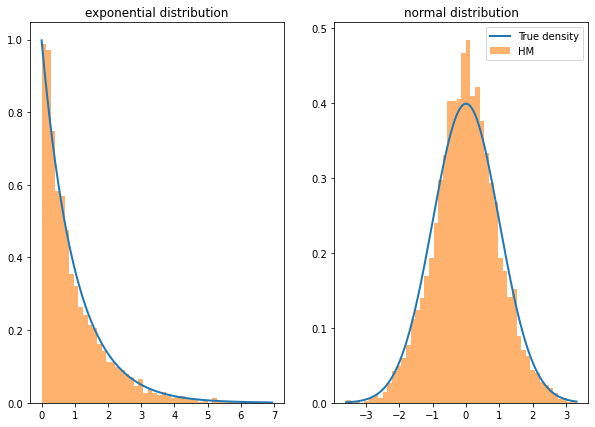

In [14]:
#parameters
x0=1
maxiter=10000
mean=0
sigma=1
dist_exp=sp.stats.expon.pdf
dist_norm=sp.stats.norm.pdf

# Simulated density 
x_sim_exp = MHM(x0, maxiter, mean, sigma, dist_exp)
x_sim_norm = MHM(x0, maxiter, mean, sigma, dist_norm)
# True density
x_exp = np.linspace(min(x_sim_exp),max(x_sim_exp),1000)
exp = sp.stats.expon.pdf(x_exp,mean,sigma)
x_norm = np.linspace(min(x_sim_norm),max(x_sim_norm),1000)
norm = sp.stats.norm.pdf(x_norm,mean,sigma)


fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(10,7))
ax1.plot(x_exp , exp , linewidth = 2 , label = 'True density')
ax1.hist(x_sim_exp , bins = 50 , density = True , alpha=0.6 , label = 'HM')
ax1.set_title('exponential distribution')

ax2.plot(x_norm , norm , linewidth = 2 , label = 'True density')
ax2.hist(x_sim_norm , bins = 50 , density = True , alpha=0.6 , label = 'HM')
ax2.set_title('normal distribution')
plt.legend()
plt.show()